In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from sklearn import decomposition
from sklearn import datasets
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df[df['Class']!=1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.Time.median()

84692.0

In [6]:
df[df['Class']!=1].Time.median()

84711.0

In [7]:
df[df['Class']==1].Time.median()

75568.5

In [8]:
df.Amount.median(),df[df['Class']!=1].Amount.median(),df[df['Class']==1].Amount.median()

(22.0, 22.0, 9.25)

In [9]:
import random

df_C0=df[df['Class']!=1].iloc[random.sample(range(1,284000), 600)]
df_C1=df[df['Class']==1]

df_model=pd.concat([df_C0,df_C1])

df_model

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184134,126107.0,2.097592,0.467218,-2.071261,1.120439,0.993114,-1.085544,0.896141,-0.519399,-0.344760,...,0.172430,0.635798,-0.041711,0.767259,0.620463,-0.451425,-0.036313,-0.058698,2.00,0
122235,76487.0,-1.413427,1.304650,2.939895,2.575872,-0.826681,0.632472,-0.127363,0.274787,-0.304589,...,0.114556,0.922379,-0.093547,0.517485,0.104598,0.381654,0.569513,0.119719,29.02,0
91307,63407.0,-0.626692,0.743761,2.036678,0.013749,0.347794,-0.694139,1.129416,-0.523417,-0.276188,...,-0.251892,-0.193707,0.197008,0.622088,-0.301000,0.002442,-0.135934,-0.348715,15.98,0
21194,31530.0,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,...,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,0
103987,68873.0,1.264034,0.134980,0.206048,0.166760,-0.572651,-1.521006,0.280041,-0.294137,0.029611,...,-0.427646,-1.341083,0.253138,0.710719,0.027525,0.603772,-0.107094,0.006552,13.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
#LogReg DF
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.score(X_test,y_test)

0.999204147794436

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
#Inbalance LogReg DF_MODEL

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.9603658536585366

In [19]:
#SVC DF
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn import model_selection
from sklearn import svm
clf = svm.SVC()#kernel = 'linear'
clf.fit(X_train, y_train)
print('Model score using default parameters is = ', clf.score(X_test, y_test))

In [31]:
#SVC DF_MODEL

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import model_selection
from sklearn import svm
clf = svm.SVC(kernel = 'linear')#kernel = 'linear'
clf.fit(X_train, y_train)
print('Model score using default parameters is = ', clf.score(X_test, y_test))

Model score using default parameters is =  0.9542682926829268


In [36]:
confusion_matrix(y_test, clf.predict(X_test))

array([[166,   2],
       [ 13, 147]], dtype=int64)

In [37]:
#KNN DF

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
confusion_matrix(y_test, knn_model.predict(X_test))

In [41]:
knn_model.score(X_test, y_test)

In [49]:
#KNN DF_MODEL

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [51]:
x=[]
y=[]
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    model=knn_model.score(X_test, y_test)
    x.append(k)
    y.append(model)

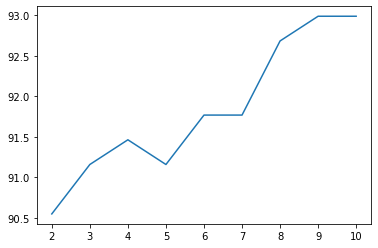

In [52]:
plt.plot(np.array(x)[1:10],np.array(y)[1:10]*100)

In [54]:
#Tree DF
#DF name digget

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9993


In [79]:
#Tree DF_MODEL GINI
#DF_MODEL name digget 

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9207


In [81]:
clf_gini.score(X_train, y_train)

0.9424083769633508

In [82]:
cfm=confusion_matrix(y_test, clf_gini.predict(X_test))
cfm

array([[153,  15],
       [ 11, 149]], dtype=int64)

In [70]:
cfm[1,1]/(cfm[1,0]+cfm[1,1])

0.93125

In [72]:
mmd=[]
result=[]
for md in range(1,20):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=0)
    clf_gini.fit(X_train, y_train)
    cfm=confusion_matrix(y_test, clf_gini.predict(X_test))
    mmd.append(md)
    result.append(cfm[1,1]/(cfm[1,0]+cfm[1,1]))

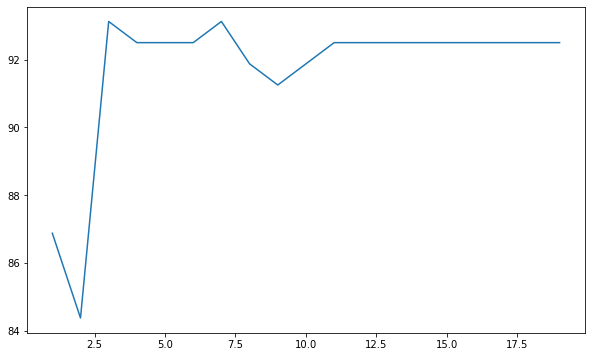

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mmd)[0:20],np.array(result)[0:20]*100)

In [104]:
#Tree DF_MODEL GINI
#DF_MODEL name digget 

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
clf_ent.fit(X_train, y_train)

y_pred_gini = clf_ent.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9146


In [99]:

mmd=[]
result=[]
for md in range(1,20):
    clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=0)
    clf_ent.fit(X_train, y_train)
    cfm=confusion_matrix(y_test, clf_ent.predict(X_test))
    mmd.append(md)
    result.append(cfm[1,1]/(cfm[1,0]+cfm[1,1]))

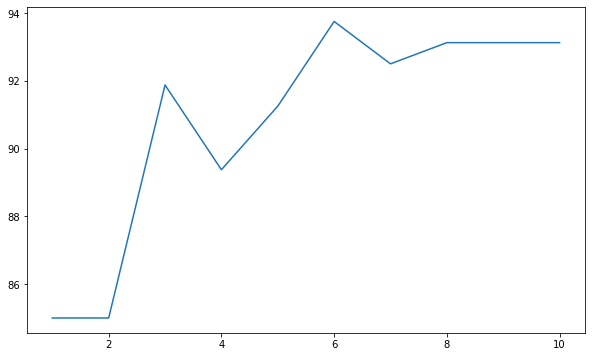

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mmd)[0:10],np.array(result)[0:10]*100)

In [131]:
#Randob Forest  DF_Model

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=10,max_depth=10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [128]:
#Randob Forest  DF_Model

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=125,max_depth=10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=125, random_state=42)

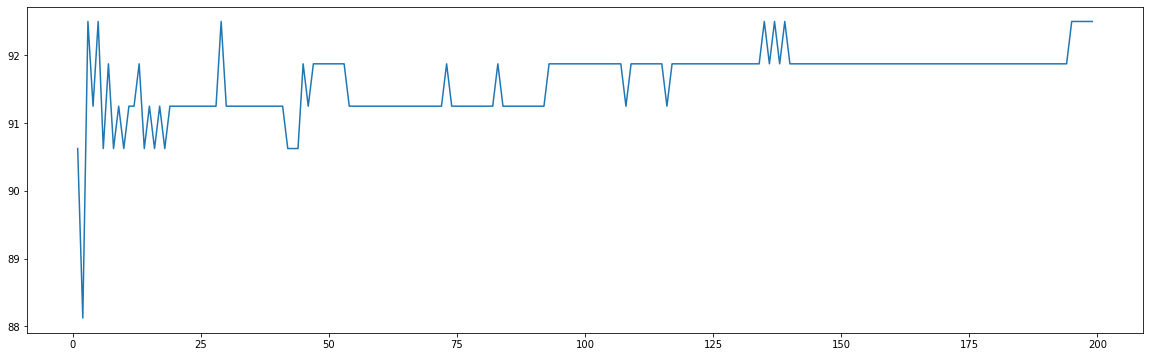

In [115]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)

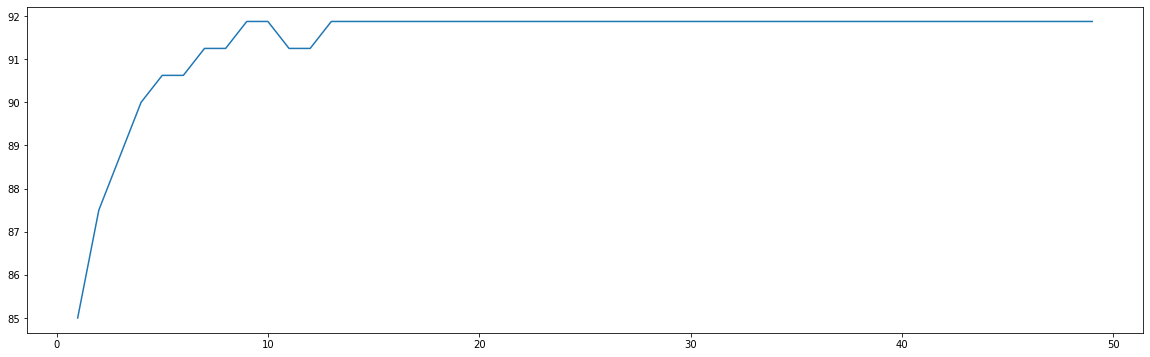

In [125]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)#50

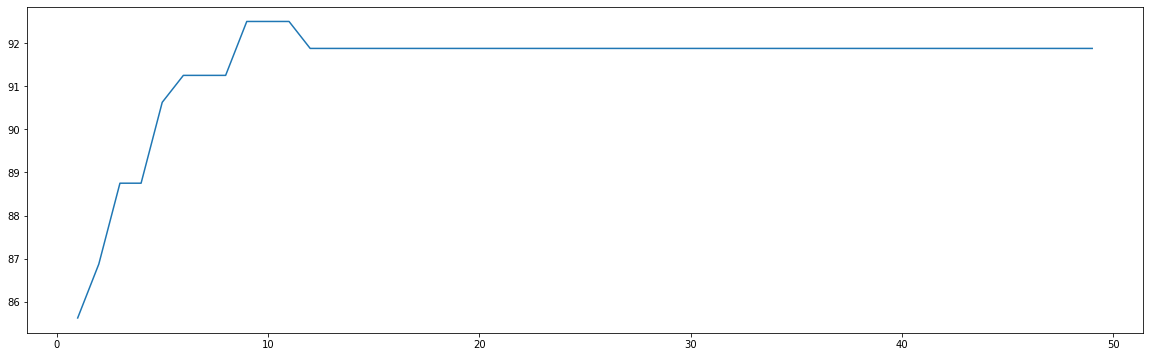

In [127]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)#125

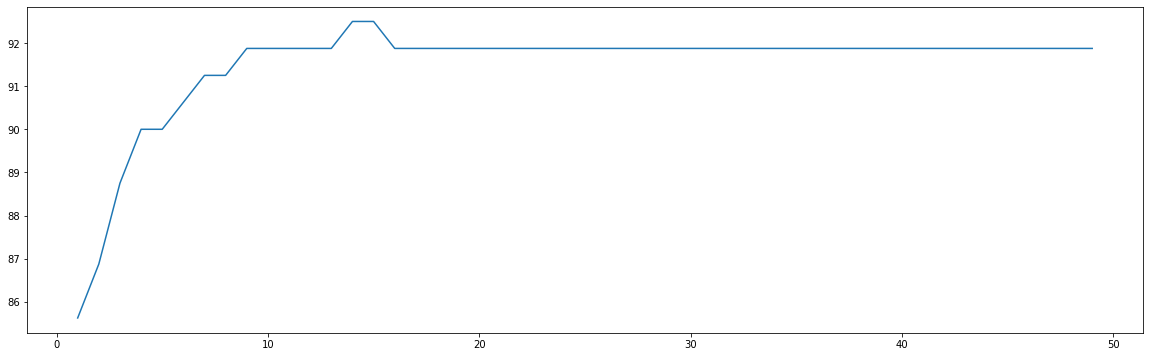

In [123]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)#100

In [136]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ex_tree_clf = ExtraTreesClassifier(n_estimators=100, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_features=7, random_state=42)

In [266]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ex_tree_clf = ExtraTreesClassifier(n_estimators=125,max_depth=23,max_features=22, random_state=42)
ex_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=25, max_features=25, n_estimators=125,
                     random_state=42)

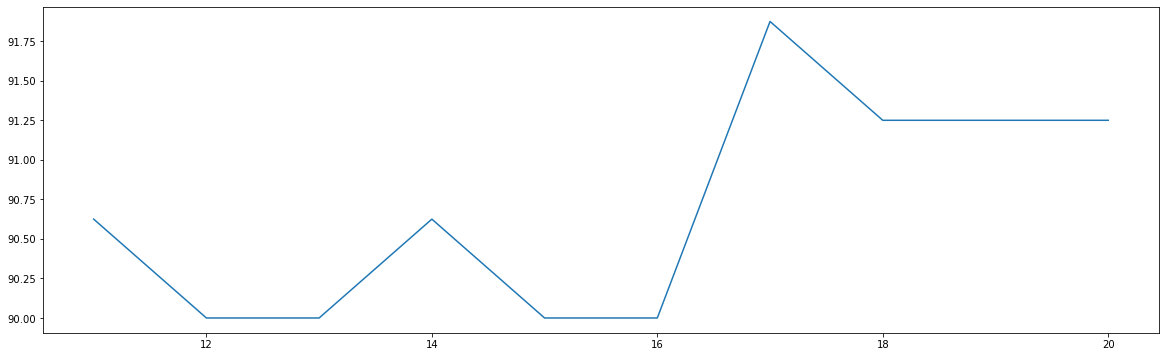

In [244]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est)[10:20],np.array(result)[10:20]*100)
#125

In [245]:
est=[]
result=[]
for md in range(1,50):
    ex_tree_clf = ExtraTreesClassifier(n_estimators=17,max_depth=md)
    ex_tree_clf.fit(X_train, y_train)
    cfm=confusion_matrix(y_test, ex_tree_clf.predict(X_test))
    est.append(md)
    result.append(cfm[1,1]/(cfm[1,0]+cfm[1,1]))
    print(md)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


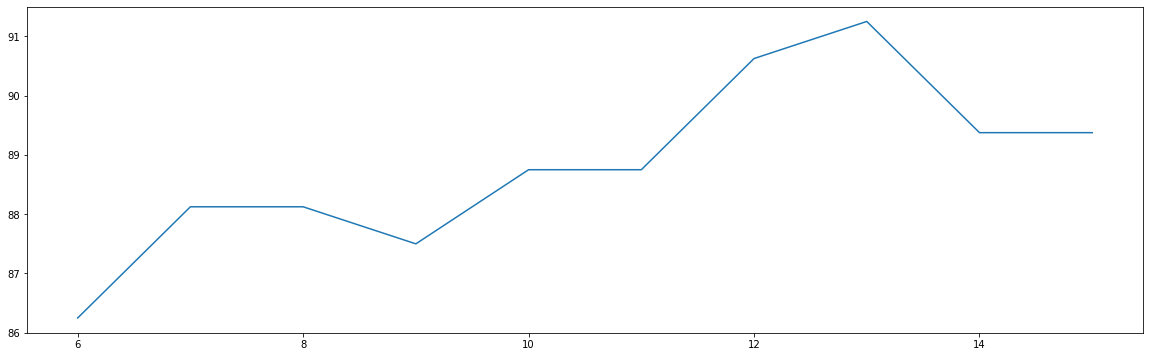

In [247]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est)[5:15],np.array(result)[5:15]*100)

#10 max depth

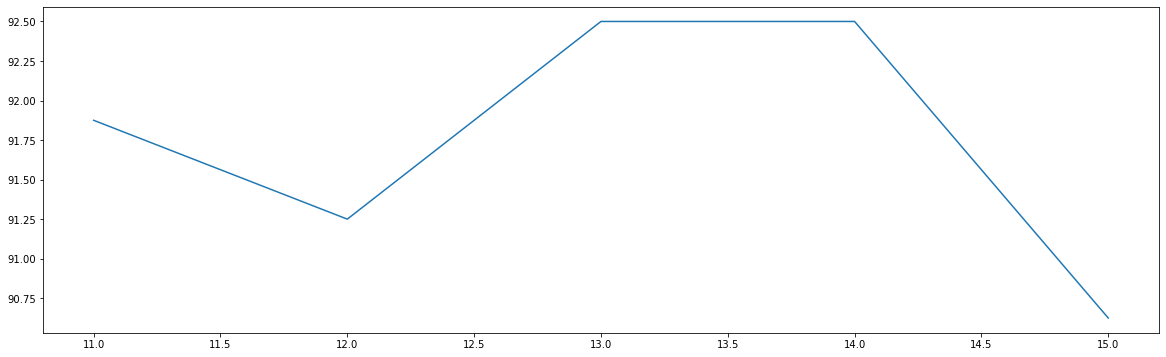

In [251]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est)[10:15],np.array(result)[10:15]*100)



In [185]:
est=[]
result=[]
for md in range(1,30):
    rf_clf = RandomForestClassifier(random_state=42, n_estimators=125,max_depth=md,max_features=16)
    rf_clf.fit(X_train, y_train)
    cfm=confusion_matrix(y_test, rf_clf.predict(X_test))
    est.append(md)
    result.append(cfm[1,1]/(cfm[1,0]+cfm[1,1]))
    print(md)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


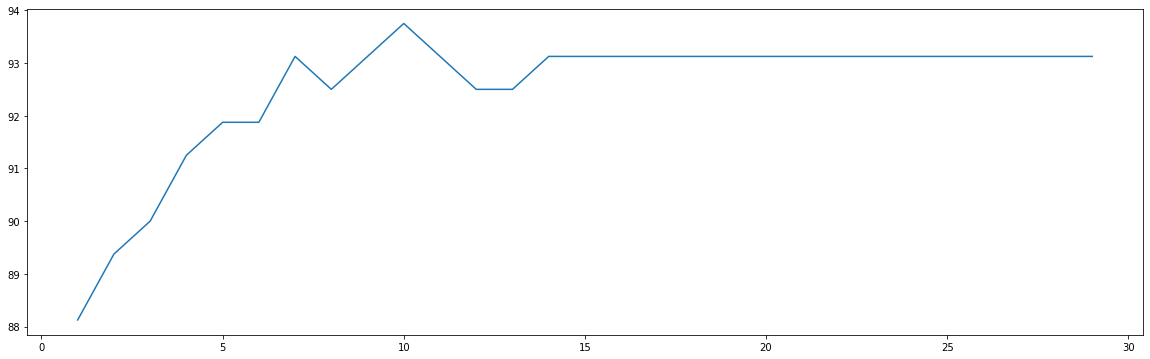

In [187]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)


In [218]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ada_boost_clf = AdaBoostClassifier(n_estimators=19)
ada_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=19)

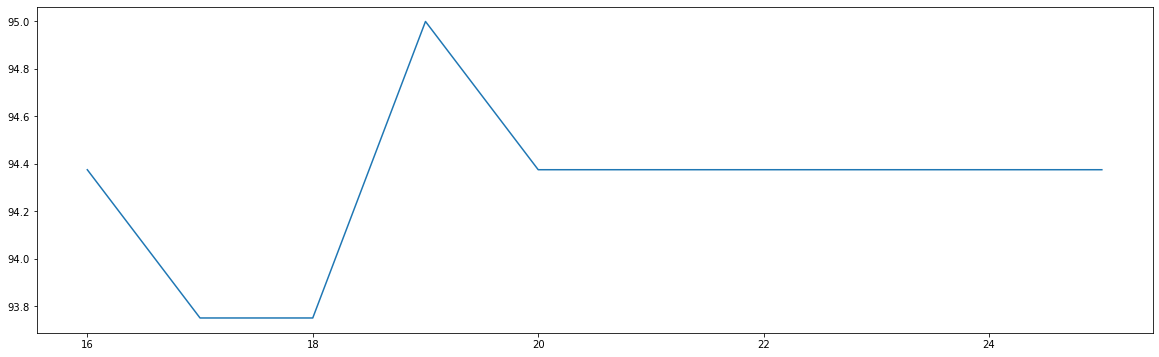

In [213]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est)[15:25],np.array(result)[15:25]*100)

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(['Class'],axis=1),df_model.Class , test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

grad_boost_clf = GradientBoostingClassifier(n_estimators=120, random_state=42)
grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=120, random_state=42)

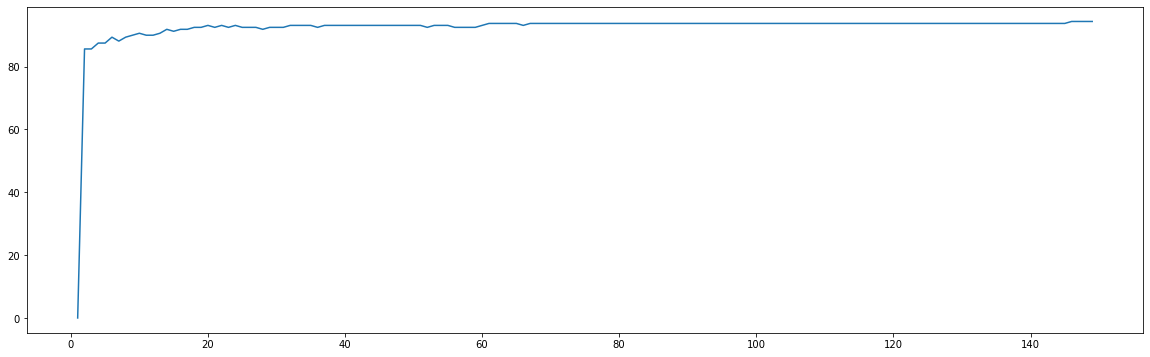

In [227]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(est),np.array(result)*100)

In [236]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []

log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Tree', DecisionTreeClassifier()),
                             ('SVM', SVC())])